In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# dataset = pd.read_csv('test_all.csv', encoding = 'ISO-8859-1')
dataset = pd.read_csv('database/arquivo_finalizado.csv', index_col=0)

In [3]:
dataset["Classe"].unique()

array([0, 1, 2, 3], dtype=int64)

In [4]:
dataset = dataset.sample(frac = 1)

In [5]:
train_dataset = dataset.sample(frac=0.70,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
train_stats = train_dataset.describe()
train_stats.pop("Classe")
train_stats = train_stats.transpose()

In [7]:
train_labels = train_dataset.pop('Classe')
test_labels = test_dataset.pop('Classe')

In [8]:
labelencoder = LabelEncoder()
train_labels = labelencoder.fit_transform(train_labels)
train_labels = np_utils.to_categorical(train_labels)

In [9]:
test_labels = labelencoder.fit_transform(test_labels)
test_labels = np_utils.to_categorical(test_labels)

In [10]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [11]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [16]:
model = Sequential()
model.add(Dense(units = 128, activation = 'relu', input_dim = 17))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 4, activation = 'softmax'))

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
                  metrics = ['categorical_accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               2304      
                                                                 
 dense_8 (Dense)             (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 64)                16448     
                                                                 
 dense_13 (Dense)            (None, 4)                

In [20]:
model.fit(
    normed_train_data, train_labels,
    epochs=10,
    batch_size=64
)

Epoch 1/10
28684/63284 [============>.................] - ETA: 5:07 - loss: 1.3020 - categorical_accuracy: 0.3504

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(normed_test_data, test_labels)

42/42 [==============================] - 0s 3ms/step - loss: 3.8862 - categorical_accuracy: 0.4868


In [ ]:
test_predictions = model.predict(normed_test_data)

42/42 [==============================] - 0s 2ms/step


In [ ]:
class_predict = [np.argmax(t) for t in test_labels]
predict = [np.argmax(t) for t in test_predictions]

In [ ]:
matriz = confusion_matrix(predict, class_predict)
print(matriz)

[[333 347]
 [332 311]]


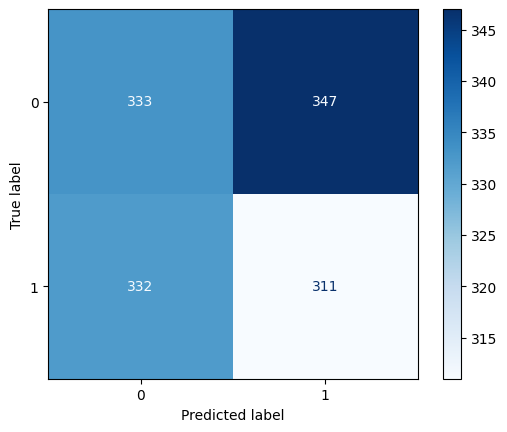

In [ ]:
labels = [0, 1, 2, 3]
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()